### Imports

In [1]:
# imports
from feature_processor import *
from bvar import *

### Feature processing

In [2]:
# path to data folder
path = '/home/romain/clean_codes/5_bvar'
# name of file containing monthly features
feature_file = 'features.csv'
# name of file containing the information about monthly data
information_file = 'information.csv'

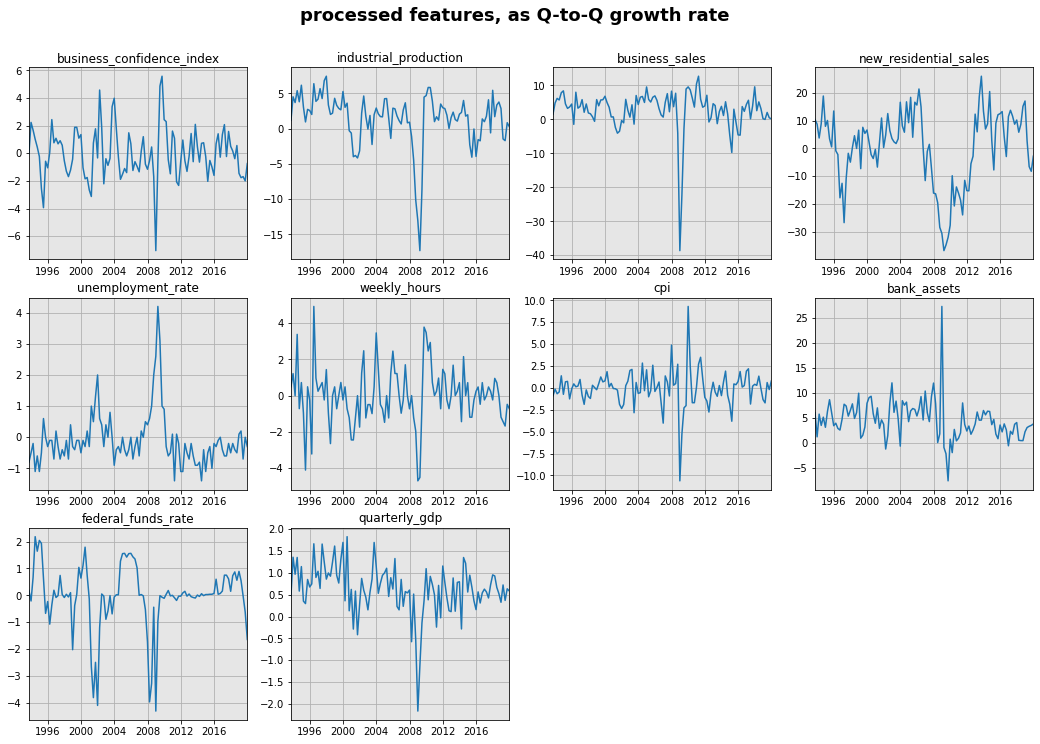

In [3]:
# declare feature processor
fp = FeatureProcessor(path, feature_file, information_file)
# load, process, and plot
fp.data_loader()
fp.data_processor()
fp.plot_processed_data()

In [4]:
# overview of processed features in dataframe
features = fp.processed_features
features.head(6)

,business_confidence_index,industrial_production,business_sales,new_residential_sales,unemployment_rate,weekly_hours,cpi,bank_assets,federal_funds_rate,quarterly_gdp
date,,,,,,,,,,
1993-09-30,-0.01763,1.174819,1.526916,10.375088,-0.8,0.489573,-0.896798,6.056690,0.18,0.477315
1993-12-31,2.23292,4.516257,4.820045,8.713100,-0.5,1.212714,-0.140156,1.243932,-0.21,1.360113
1994-03-31,1.67461,3.695746,6.177410,3.742247,-0.2,-0.009381,-0.671583,5.767958,0.67,0.970216
1994-06-30,1.01670,5.385214,5.706889,8.908318,-1.1,3.377695,-0.459493,3.522080,2.18,1.355046
1994-09-30,0.45180,3.808076,7.841516,18.823001,-0.6,-0.719138,1.381100,5.161621,1.64,0.584515
1994-12-31,-0.23480,6.156890,8.395498,7.938450,-1.1,0.719138,-0.734759,3.148223,2.04,1.145524


### Bayesian VAR model

In [5]:
# lags
p = 2
# Minnesota hyperparameters: autoregressif coefficient
rho = 0.9
# Minnesota hyperparameters: overall tightness lambda_1
lambda_1 = 0.1
# Minnesota hyperparameters: cross-variable tightness lambda_2
lambda_2 = 0.5
# Minnesota hyperparameters: lag-specific tightness lambda_3
lambda_3 = 2
# Minnesota hyperparameters: exogenous variable tightness lambda_4
lambda_4 = 100
# number of retained iterations of the MCMC algorithm
r = 2000
# number of burn-in iterations of the MCMC algorithm
d = 1000

In [6]:
# declare Bayesian VAR
bvar = Bayesian_Var(feature_dataframe = features)
# get prior hyperparameters
bvar.prior(p, rho, lambda_1, lambda_2, lambda_3, lambda_4)
# mcmc algorithm
bvar.mcmc(r, d)

100 iterations of mcmc algorithm.
200 iterations of mcmc algorithm.
300 iterations of mcmc algorithm.
400 iterations of mcmc algorithm.
500 iterations of mcmc algorithm.
600 iterations of mcmc algorithm.
700 iterations of mcmc algorithm.
800 iterations of mcmc algorithm.
900 iterations of mcmc algorithm.
1000 iterations of mcmc algorithm.
1100 iterations of mcmc algorithm.
1200 iterations of mcmc algorithm.
1300 iterations of mcmc algorithm.
1400 iterations of mcmc algorithm.
1500 iterations of mcmc algorithm.
1600 iterations of mcmc algorithm.
1700 iterations of mcmc algorithm.
1800 iterations of mcmc algorithm.
1900 iterations of mcmc algorithm.
2000 iterations of mcmc algorithm.


### predictions

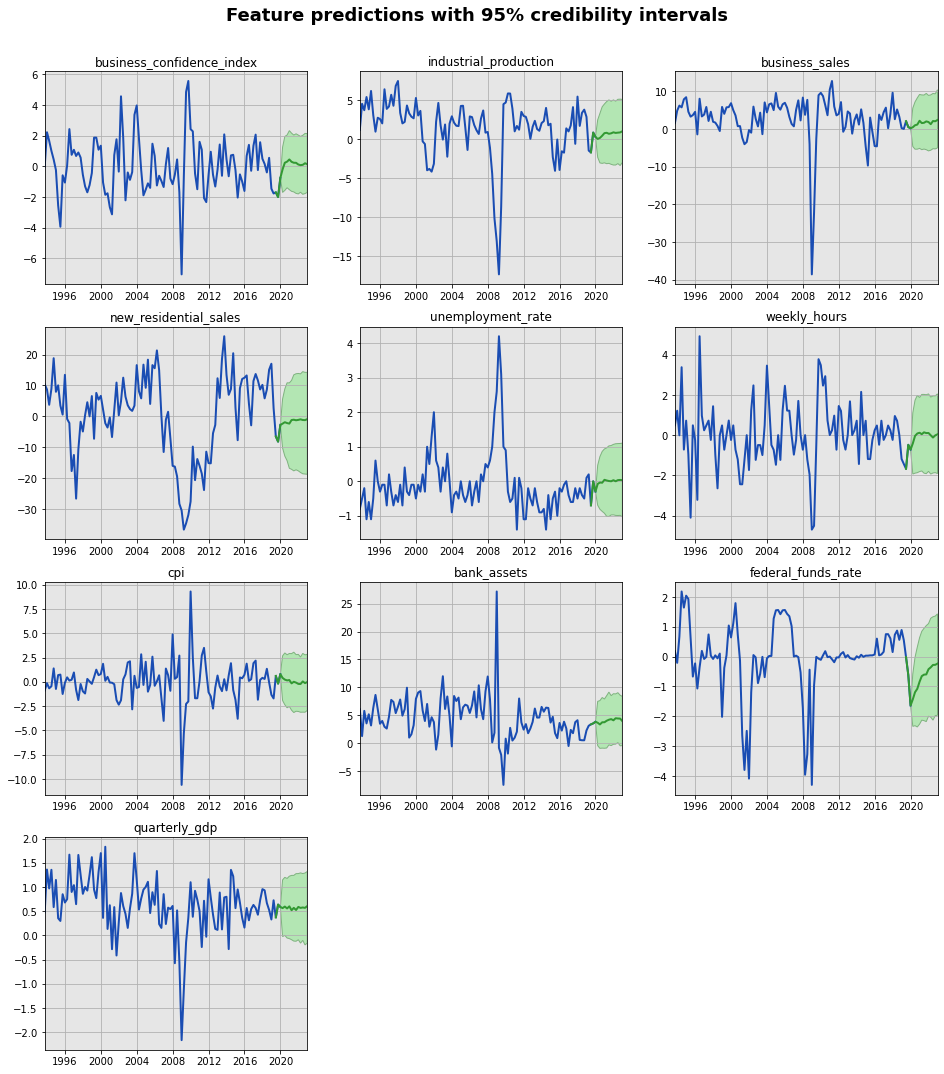

In [7]:
# number of periods ahead to forecast (in quarters)
h = 12
# generate predictions
bvar.forecast(h)
# plot predictions
bvar.plot_forecast()